In [1]:
library(tidyverse)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# 1. histogram of the number of gene sets per lib_name

In [2]:
geneset_sz = readr::read_tsv("geneset_sz.tsv")

Rows: 9967 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): lib_name, descr
dbl (1): num_genes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(geneset_sz)

lib_name,descr,num_genes
<chr>,<chr>,<dbl>
KEGG_2021_Human,ABC transporters,45
KEGG_2021_Human,AGE-RAGE signaling pathway in diabetic complications,100
KEGG_2021_Human,AMPK signaling pathway,120
KEGG_2021_Human,Acute myeloid leukemia,67
KEGG_2021_Human,Adherens junction,71
KEGG_2021_Human,Adipocytokine signaling pathway,69


In [4]:
unique(geneset_sz$lib_name)

[1] "KEGG_2021_Human"            "Reactome_2022"             
[3] "WikiPathway_2023_Human"     "GO_Biological_Process_2023"
[5] "GO_Molecular_Function_2023" "GO_Cellular_Component_2023"

In [5]:
# Count the number of gene sets per lib_name
gene_set_counts <- geneset_sz %>%
  group_by(lib_name) %>%
  summarise(num_gene_sets = n()) 

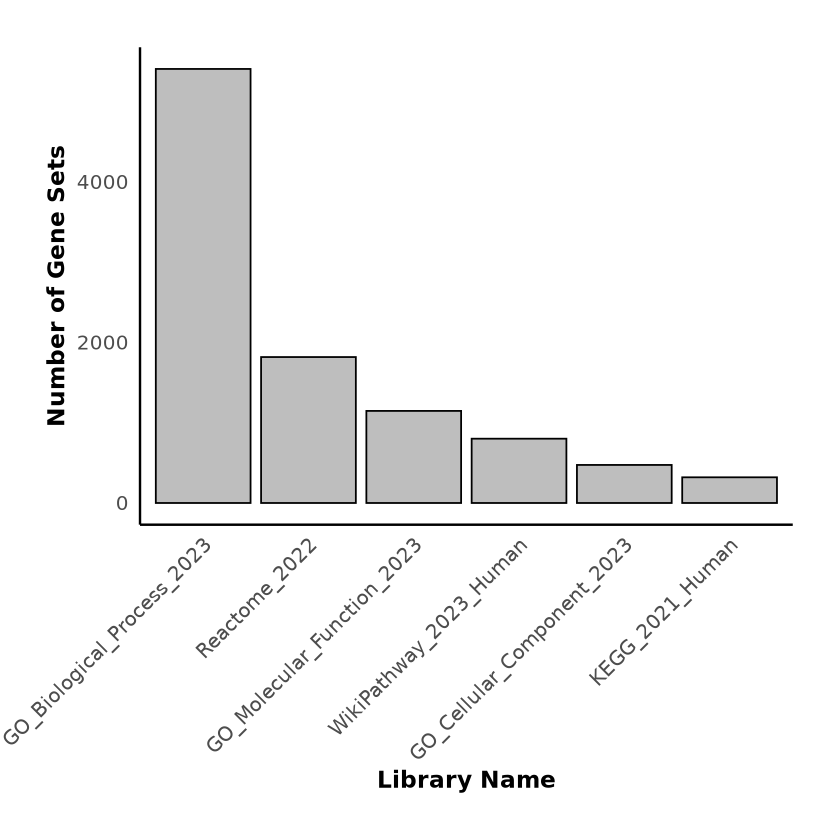

In [6]:
# Create the plot
p <- ggplot(gene_set_counts, aes(x = reorder(lib_name, -num_gene_sets), y = num_gene_sets)) +
  geom_bar(stat = "identity", fill = "grey", color = "black") +
  xlab("Library Name") +
  ylab("Number of Gene Sets") +
  theme_minimal(base_size = 15) + # Minimal theme with a base font size
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(color = "black"), 
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    plot.margin = margin(1, 1, 1, 1, "cm"), # Top, right, bottom, left margins

  ) 
p

In [7]:
ggsave("figures/1_number_of_gene_sets_per_lib.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# 2. histogram of the number of genes in each gene set for each library

In [8]:
# Create the histogram for the number of genes in each gene set for each library
p <- ggplot(geneset_sz, aes(x = num_genes, fill = lib_name)) +
  geom_histogram(bins = 50, color = "black", alpha = 0.7, position = "identity") +
  facet_wrap(~ lib_name, scales = "free") +
  xlab("Number of Genes in Gene Set") +
  ylab("Frequency") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    legend.position = "none",
    strip.text = element_text(face = "bold", size = 12),
    plot.margin = margin(1, 1, 1, 1, "cm") # Top, right, bottom, left margins
  )


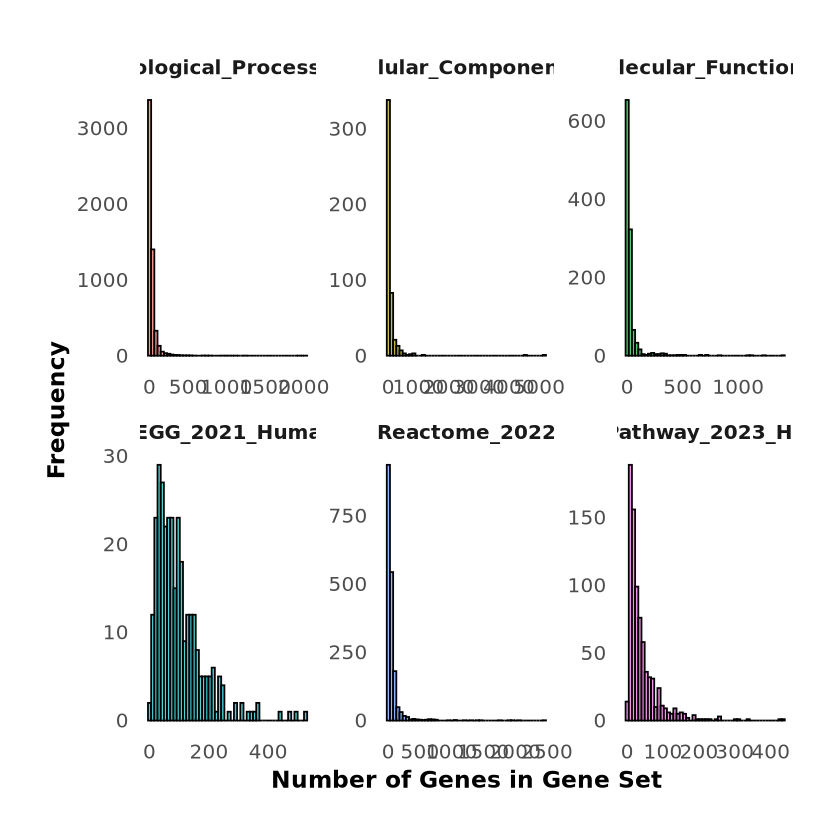

In [9]:
p

In [10]:
ggsave("figures/2_number_of_genes_per_lib.pdf", plot = p, device = "pdf", width = 15, height = 8, dpi = 300)

# 3.  boxplot of the number of genes in each gene set for each library

Warning message:
“The dot-dot notation (`..y..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(y)` instead.”


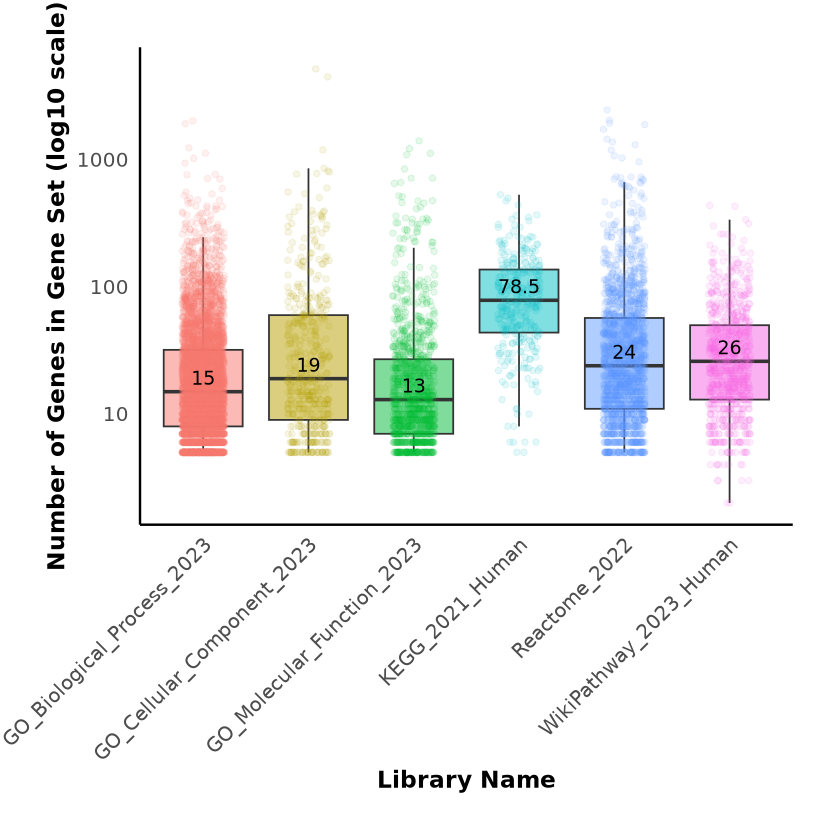

In [11]:
p <- ggplot(geneset_sz, aes(x = lib_name, y = num_genes, fill = lib_name)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.5) +  # Add a boxplot, outlier.shape = NA hides the outliers
  geom_jitter(width = 0.2, alpha = 0.1, aes(color = lib_name)) +  # Add jittered points to show individual data points
  stat_summary(fun = median, geom = "text", aes(label = round(..y.., 1)), vjust = -0.5, color = "black", size = 4) +  # Add median values
  scale_y_log10() +  # Use a logarithmic scale for the y-axis
  xlab("Library Name") +
  ylab("Number of Genes in Gene Set (log10 scale)") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    legend.position = "none",
    strip.text = element_text(face = "bold", size = 12),
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [12]:
ggsave("figures/3_boxplot_number_of_genes_per_lib.pdf", plot = p, device = "pdf", width = 8, height = 8, dpi = 300)

# 4. Percentage of significant gene sets

In [13]:
df = readr::read_tsv("genes_overlap.tsv")

Rows: 19934 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): database, model, descr
dbl (8): ncurated, nllm, ninter, ndup, generatio, bgratio, p_val, p_val_adj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [14]:
head(df)

database,model,descr,ncurated,nllm,ninter,ndup,generatio,bgratio,p_val,p_val_adj
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KEGG_2021_Human,gpt-3.5-turbo-0125,ABC transporters,45,13,12,0,0.9230769,0.002267459,4.938589e-32,1.580348e-29
KEGG_2021_Human,gpt-3.5-turbo-0125,AGE-RAGE signaling pathway in diabetic complications,100,35,7,0,0.2000000,0.005038799,4.133373e-10,1.322679e-07
KEGG_2021_Human,gpt-3.5-turbo-0125,AMPK signaling pathway,120,27,14,0,0.5185185,0.006046559,8.155356e-25,2.609714e-22
KEGG_2021_Human,gpt-3.5-turbo-0125,Acute myeloid leukemia,67,11,6,0,0.5454545,0.003375995,5.475707e-13,1.752226e-10
KEGG_2021_Human,gpt-3.5-turbo-0125,Adherens junction,71,19,13,0,0.6842105,0.003577547,1.371074e-28,4.387436e-26
KEGG_2021_Human,gpt-3.5-turbo-0125,Adipocytokine signaling pathway,69,29,17,0,0.5862069,0.003476771,9.933004e-36,3.178561e-33


In [15]:
# Compute the percentage of "descr" that has "p_val_adj" < 0.01 for each "database" and "model"
percentage_df <- df %>%
  group_by(database, model) %>%
  summarise(percentage = sum(p_val_adj < 0.01) / n() * 100)

`summarise()` has grouped output by 'database'. You can override using the
`.groups` argument.


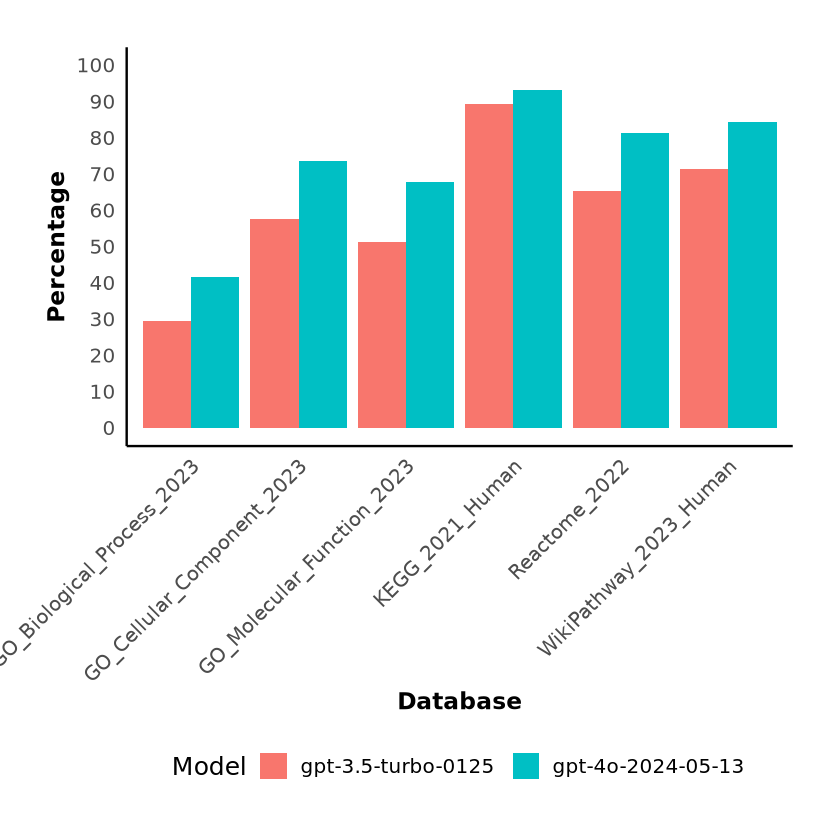

In [16]:
# Create the bar plot
p <- ggplot(percentage_df, aes(x = database, y = percentage, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous(breaks = seq(0, 100, by = 10), limits = c(0, 100))+
  labs(
       x = "Database",
       y = "Percentage",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [17]:
ggsave("figures/4_percent_sig_compare_models.pdf", plot = p, device = "pdf", width = 10, height = 8, dpi = 300)

# 5. -log10(p-values) for gpt-4o versus gpt-3.5

In [18]:
df = readr::read_tsv("genes_overlap.tsv")

Rows: 19934 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): database, model, descr
dbl (8): ncurated, nllm, ninter, ndup, generatio, bgratio, p_val, p_val_adj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [19]:
# log transform
df <- df %>%
    mutate(log_p = -log10(p_val))

In [20]:
head(df,3)

database,model,descr,ncurated,nllm,ninter,ndup,generatio,bgratio,p_val,p_val_adj,log_p
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KEGG_2021_Human,gpt-3.5-turbo-0125,ABC transporters,45,13,12,0,0.9230769,0.002267459,4.938589e-32,1.580348e-29,31.306397
KEGG_2021_Human,gpt-3.5-turbo-0125,AGE-RAGE signaling pathway in diabetic complications,100,35,7,0,0.2000000,0.005038799,4.133373e-10,1.322679e-07,9.383695
KEGG_2021_Human,gpt-3.5-turbo-0125,AMPK signaling pathway,120,27,14,0,0.5185185,0.006046559,8.155356e-25,2.609714e-22,24.088557


In [21]:
library(gridExtra)

In [22]:
df[df$p_val==0,]

database,model,descr,ncurated,nllm,ninter,ndup,generatio,bgratio,p_val,p_val_adj,log_p
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Reactome_2022,gpt-4o-2024-05-13,SLC-mediated Transmembrane Transport,247,354,214,2,0.6045198,0.01244583,0,0,Inf


In [28]:
df[df$log_p==0,]

database,model,descr,ncurated,nllm,ninter,ndup,generatio,bgratio,p_val,p_val_adj,log_p
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KEGG_2021_Human,gpt-3.5-turbo-0125,Alcoholism,186,5,0,0,0,0.0093721657,1,1,0
KEGG_2021_Human,gpt-3.5-turbo-0125,Axon guidance,182,12,0,0,0,0.0091706137,1,1,0
KEGG_2021_Human,gpt-3.5-turbo-0125,Influenza A,172,7,0,0,0,0.0086667339,1,1,0
KEGG_2021_Human,gpt-3.5-turbo-0125,Kaposi sarcoma-associated herpesvirus infection,193,20,0,2,0,0.0097248816,1,1,0
KEGG_2021_Human,gpt-3.5-turbo-0125,"Neomycin, kanamycin and gentamicin biosynthesis",5,30,0,0,0,0.0002519399,1,1,0
KEGG_2021_Human,gpt-3.5-turbo-0125,Other types of O-glycan biosynthesis,47,8,0,0,0,0.0023682354,1,1,0
KEGG_2021_Human,gpt-3.5-turbo-0125,Pentose and glucuronate interconversions,34,15,0,2,0,0.0017131916,1,1,0
KEGG_2021_Human,gpt-3.5-turbo-0125,Phosphonate and phosphinate metabolism,6,10,0,0,0,0.0003023279,1,1,0
KEGG_2021_Human,gpt-3.5-turbo-0125,Retrograde endocannabinoid signaling,148,6,0,0,0,0.0074574222,1,1,0


Warning message:
“Removed 12 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 23 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


TableGrob (2 x 3) "arrange": 6 grobs
                           z     cells    name           grob
KEGG_2021_Human            1 (1-1,1-1) arrange gtable[layout]
Reactome_2022              2 (1-1,2-2) arrange gtable[layout]
WikiPathway_2023_Human     3 (1-1,3-3) arrange gtable[layout]
GO_Biological_Process_2023 4 (2-2,1-1) arrange gtable[layout]
GO_Molecular_Function_2023 5 (2-2,2-2) arrange gtable[layout]
GO_Cellular_Component_2023 6 (2-2,3-3) arrange gtable[layout]


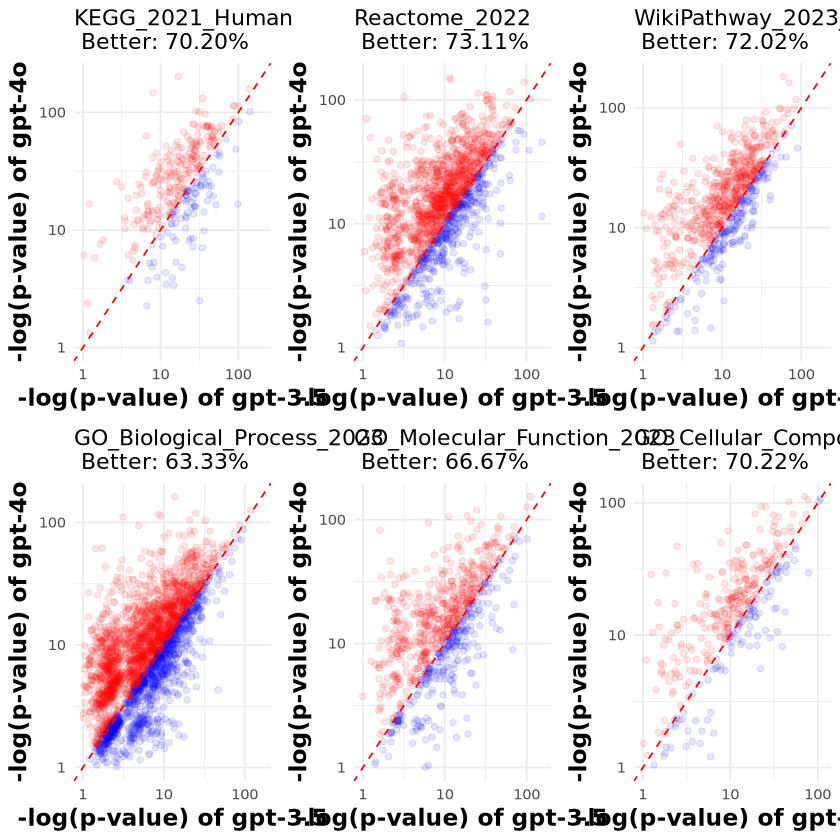

In [23]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(gridExtra)

# Filter data for unique models
model1 <- df %>% filter(model == "gpt-3.5-turbo-0125")
model2 <- df %>% filter(model == "gpt-4o-2024-05-13")

# Initialize an empty list to store plots
plots <- list()

# For each database, plot log_p of gpt-3.5-turbo-0125 against log_p of gpt-4o-2024-05-13
databases <- unique(df$database)
for(d in databases){
  df1 <- model1 %>% filter(database == d)
  df2 <- model2 %>% filter(database == d)
  joined_df <- merge(df1, df2, by = "descr", suffixes = c("_1", "_2"))
  joined_df <- joined_df %>% filter(!is.infinite(log_p_1) & !is.infinite(log_p_2)) # Drop rows with inf values
  
  # Filter out non-positive values for log transformation
  joined_df <- joined_df %>% filter(log_p_1 > 0 & log_p_2 > 0)
  
  # Proceed only if there are valid rows left after filtering
  if (nrow(joined_df) > 0) {
    # Classify points relative to the diagonal line
    joined_df <- joined_df %>% mutate(position = ifelse(log_p_1 < log_p_2, "better", "worse"))
    
    # Calculate proportions
    proportion_better <- sum(joined_df$position == "better") / nrow(joined_df)
    proportion_worse <- sum(joined_df$position == "worse") / nrow(joined_df)
    
    max_value <- max(max(joined_df$log_p_1, na.rm = TRUE), max(joined_df$log_p_2, na.rm = TRUE))

    plots[[d]] <- ggplot(joined_df, aes(x = log_p_1, y = log_p_2, color = position)) +
      geom_point(alpha=0.1, show.legend = FALSE) +
      geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +  # Add diagonal line
      labs(title = paste(d, 
                         sprintf("\n Better: %.2f%%", proportion_better * 100) 
                         ),
           x = "-log(p-value) of gpt-3.5", 
           y = "-log(p-value) of gpt-4o") +
      theme_minimal() +
      scale_x_log10(limits = c(1, max_value)) +  # Transform x-axis to log scale
      scale_y_log10(limits = c(1, max_value)) +  # Transform y-axis to log scale
      scale_color_manual(values = c("better" = "red", "worse" = "blue"))+
      theme(
        axis.title.x = element_text(face = "bold", size = 14),
        axis.title.y = element_text(face = "bold", size = 14)
      )
  } else {
    warning(paste("No valid data for database:", d))
  }
}

# Combine all plots into a single faceted plot
if (length(plots) > 0) {
  combined_plot <- do.call(gridExtra::grid.arrange, c(plots, ncol = 3))
  
  # Display the combined plot
  print(combined_plot)
} else {
  print("No valid plots to display.")
}


In [24]:
# Save the plot
ggsave(filename = "figures/5_scatter_plot_logp_compare_models.pdf", plot = combined_plot, device = "pdf", width = 10, height = 10, dpi = 300)

TableGrob (2 x 3) "arrange": 6 grobs
                           z     cells    name           grob
KEGG_2021_Human            1 (1-1,1-1) arrange gtable[layout]
Reactome_2022              2 (1-1,2-2) arrange gtable[layout]
WikiPathway_2023_Human     3 (1-1,3-3) arrange gtable[layout]
GO_Biological_Process_2023 4 (2-2,1-1) arrange gtable[layout]
GO_Molecular_Function_2023 5 (2-2,2-2) arrange gtable[layout]
GO_Cellular_Component_2023 6 (2-2,3-3) arrange gtable[layout]


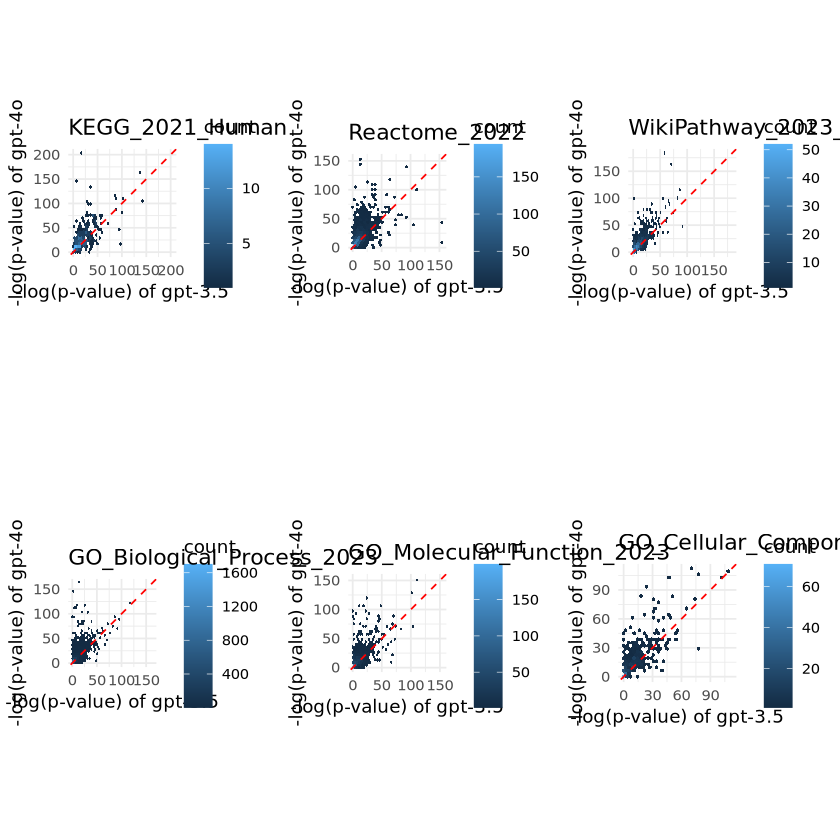

In [25]:
library(hexbin)
# Filter data for unique models
model1 <- df %>% filter(model == "gpt-3.5-turbo-0125")
model2 <- df %>% filter(model == "gpt-4o-2024-05-13")

# Initialize an empty list to store plots
plots <- list()

# For each database, plot log_p of gpt-3.5-turbo-0125 against log_p of gpt-4o-2024-05-13
databases <- unique(df$database)
for(d in databases){
  df1 <- model1 %>% filter(database == d)
  df2 <- model2 %>% filter(database == d)
  joined_df <- merge(df1, df2, by = "descr", suffixes = c("_1", "_2"))
  joined_df <- joined_df %>% filter(!is.infinite(log_p_1)) # drop rows with inf values
  joined_df <- joined_df %>% filter(!is.infinite(log_p_2))
  max_value <- max(max(joined_df$log_p_1), max(joined_df$log_p_2))
  
  # Create a hexbin plot
  plots[[d]] <- ggplot(data = joined_df, aes(x = log_p_1, y = log_p_2)) +
    geom_hex(bins = 30) +  # Adjust bins as needed
    geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +  # Add diagonal line
    labs(title = d,
         x = "-log(p-value) of gpt-3.5", 
         y = "-log(p-value) of gpt-4o") +
    theme_minimal() +
    coord_equal(xlim = c(0, max_value), ylim = c(0, max_value))   # Ensure square aspect ratio
}

# Combine all plots into a single faceted plot
combined_plot <- do.call(gridExtra::grid.arrange, c(plots, ncol = 3))

# Display the combined plot
print(combined_plot)


In [26]:
ggsave(filename = "figures/5_hexbin_plot_logp_compare_models.pdf", plot = combined_plot, device = "pdf", width = 15, height = 10, dpi = 300)

# 6. GO depth vs set significance

In [2]:
df <- readr::read_tsv("GOdepth_sig.tsv",)
go_db <- unique(df$database)
plots<-list()
for (db in go_db) {
    df_long <- df %>% 
      filter(database==db)%>%
      pivot_longer(cols = starts_with("fraction"), 
                   names_to = "category", 
                   values_to = "fraction") %>%
      mutate(category = factor(category, levels = c("fraction < 0.001", "fraction >= 0.001")))
    df_long$category <- factor(df_long$category, levels = c("fraction >= 0.001", "fraction < 0.001"))

    # Plot using ggplot2
    plots[[db]]<-ggplot(df_long, aes(x = factor(go_depth), y = fraction, fill = category)) +
      geom_bar(stat = "identity", position = "stack", color = "black") +
      scale_fill_manual(values = c("grey","orange")) +
      labs(x = "go_depth", y = "Fraction", title = db,
           fill = "Fraction Category") +
      theme_minimal() +
    
      guides(fill = guide_legend(title = "Fraction Category")) +
      geom_text(aes(label = scales::percent(fraction)), vjust = -0.5, size = 3, position = position_stack(0.5)) +  # Add percentages
      ylim(0, 1) +  # Adjust y-axis limits if necessary
    
      NULL  # Suppress extra printed output    
}

Rows: 29 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): database
dbl (6): go_depth, p_val_adj >= 0.001, p_val_adj < 0.001, total, fraction < ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TableGrob (3 x 1) "arrange": 3 grobs
                           z     cells    name           grob
GO_Cellular_Component_2023 1 (1-1,1-1) arrange gtable[layout]
GO_Biological_Process_2023 2 (2-2,1-1) arrange gtable[layout]
GO_Molecular_Function_2023 3 (3-3,1-1) arrange gtable[layout]


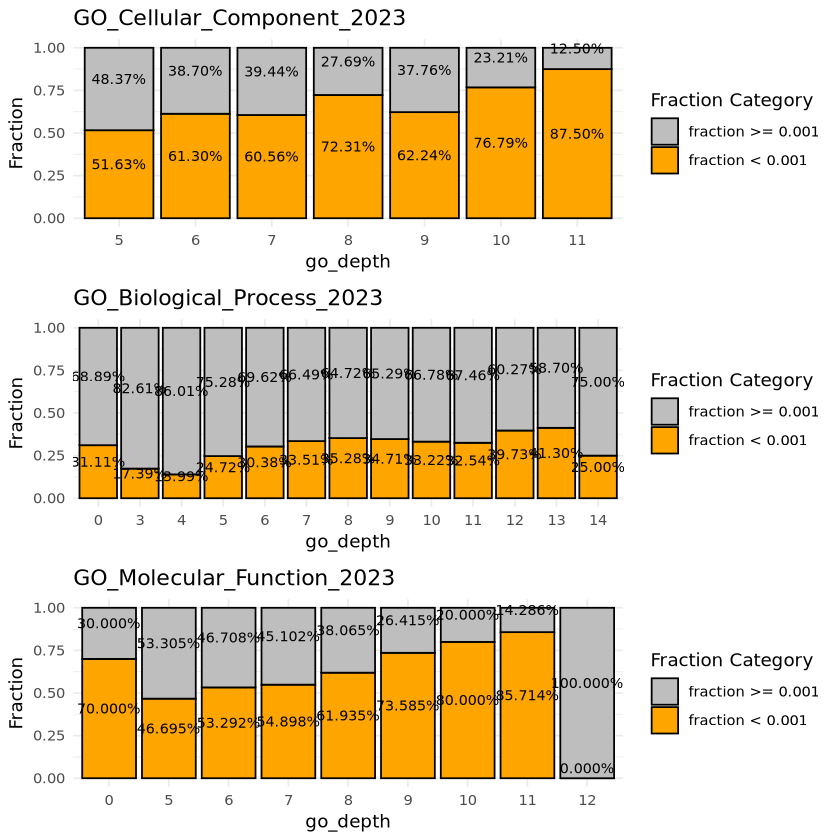

In [3]:
# Combine all plots into a single faceted plot
combined_plot <- do.call(gridExtra::grid.arrange, c(plots, ncol = 1))

# Display the combined plot
print(combined_plot)

In [4]:
ggsave(filename = "figures/6_go_depth.pdf", plot = combined_plot, device = "pdf", width = 15, height = 10, dpi = 300)